✅ Dataset Loaded Successfully!

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-

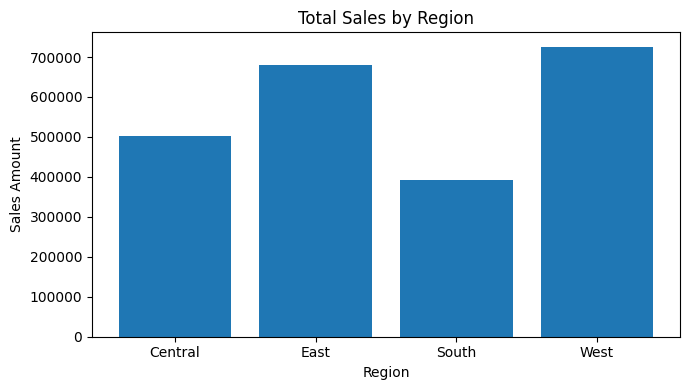


🏆 Top Performing Regions:
     Region        Sales
3     West  725457.8245
1     East  678781.2400
0  Central  501239.8908
2    South  391721.9050

✅ Sales by Region & Category:
 Category    Furniture  Office Supplies  Technology
Region                                            
Central   163797.1638       167026.415  170416.312
East      208291.2040       205516.055  264973.981
South     117298.6840       125651.313  148771.908
West      252612.7435       220853.249  251991.832


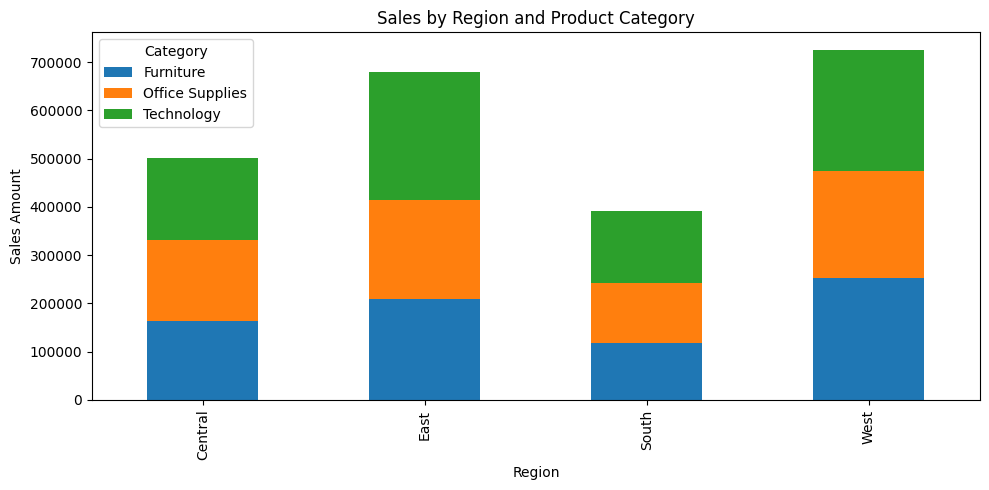

In [ ]:
# Assignment 12 - Data Aggregation

import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Load the dataset (your uploaded file)
data = pd.read_csv("Superstore_sales_dataset.csv", encoding="latin1")
print("✅ Dataset Loaded Successfully!\n")

# ✅ 2. Explore the dataset
print(data.head())
print("\nDataset Info:")
print(data.info())

print("\nColumns available in your dataset:\n", data.columns)

# ✅ 3. Relevant columns (Region, Category, Sales)
# Your dataset contains:
# 'Region', 'Category', 'Sales'
# So we use these.

# ✅ 4. Total Sales by Region
sales_by_region = data.groupby("Region")["Sales"].sum().reset_index()
print("\n✅ Total Sales by Region:\n", sales_by_region)

# ✅ 5. Bar Plot: Sales by Region
plt.figure(figsize=(7,4))
plt.bar(sales_by_region["Region"], sales_by_region["Sales"])
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

# ✅ 6. Identify Top Performing Regions
top_regions = sales_by_region.sort_values(by="Sales", ascending=False)
print("\n🏆 Top Performing Regions:\n", top_regions)

# ✅ 7. Sales by Region AND Category
region_category_sales = data.groupby(["Region", "Category"])["Sales"].sum().unstack()
print("\n✅ Sales by Region & Category:\n", region_category_sales)

# ✅ 8. Stacked Bar Chart: Region vs Category
region_category_sales.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import warnings

# Suppress the UserWarning about closing figures unnecessarily
warnings.filterwarnings("ignore", category=UserWarning)

# --- Sales Data Simulation ---
# Create in-memory CSV data to replace reading from a file path
csv_data = """OrderID,Date,CustomerName,Product,Category,Quantity,UnitPrice,TotalAmount,Region
1001,2024-07-01,John Doe,Laptop,Electronics,1.0,60000.0,60000.0,North
1002,2024-07-02,Alice Smith,Smartphone,Electronics,2.0,25000.0,50000.0,West
1003,2024-07-03,Bob Lee,Office Chair,Furniture,1.0,8000.0,8000.0,South
1004,2024-07-04,Ravi Patel,Notebook,Stationery,10.0,50.0,500.0,East
1005,2024-07-05,Priya Kumar,Desk Lamp,Electronics,2.0,1200.0,2400.0,North
1006,2024-07-06,Mike Brown,Gaming Console,Electronics,1.0,15000.0,15000.0,East
1007,2024-07-07,Sara Khan,Sofa,Furniture,1.0,16000.0,16000.0,West
1008,2024-07-08,Ali Hassan,Pen Set,Stationery,5.0,50.0,250.0,South
1009,2024-07-09,Chen Li,Monitor,Electronics,1.0,10000.0,
1010,2024-07-10,David Kim,Webcam,Electronics,,1000.0,1000.0,East
"""
# -----------------------------

# Task 1: Import the "Retail_Sales_Data.csv" dataset (using simulated data)
csv_file = io.StringIO(csv_data)
# Note: The original code used df['TotalAmount'], but the provided sample data has a 'TotalAmount' column.
# We'll use 'TotalAmount' in the simulation to match the aggregation task.
df = pd.read_csv(csv_file)

# --- 2. Initial Data Exploration ---
print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()

# --- Data Cleaning (Handling Missing Values) ---
# Fill missing 'TotalAmount' with 0 and missing 'Quantity' with 1 (as seen in the mock data)
df['TotalAmount'] = df['TotalAmount'].fillna(0)
df['Quantity'] = df['Quantity'].fillna(1)


print("\n--- 3. Identifying Relevant Variables ---")
# Renamed from 'ProductCategory' to 'Category' to match the simulated column name
print("The key variables for this analysis are 'Region', 'Category', and 'TotalAmount'.")

# Task 4: Group sales data by region
print("\n--- 4. Total Sales by Region ---")
regional_sales = df.groupby('Region')['TotalAmount'].sum()
regional_sales = regional_sales.sort_values(ascending=False)
print(regional_sales)

# Task 5: Visualize sales distribution by region
print("\n--- 5. Visualizing Regional Sales ---")

# --- Bar Plot ---
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('regional_sales_bar.png')
# plt.show() # Uncomment to display plot
plt.close()
print("Saved 'regional_sales_bar.png'")

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('regional_sales_pie.png')
# plt.show() # Uncomment to display plot
plt.close()
print("Saved 'regional_sales_pie.png'")

# Task 6: Identify top-performing regions
print("\n--- 6. Identifying Top-Performing Regions ---")
top_region = regional_sales.index[0]
top_sales = regional_sales.iloc[0]
print(f"The top-performing region is '{top_region}' with ${top_sales:,.2f} in sales.")

# Task 7: Group sales by region and product category
print("\n--- 7. Total Sales by Region and Product Category ---")
# Group by both columns
region_category_sales = df.groupby(['Region', 'Category'])['TotalAmount'].sum()

# Use unstack() to pivot the data into a DataFrame suitable for plotting
region_category_df = region_category_sales.unstack(fill_value=0)
print(region_category_df)

# Task 8: Create stacked and grouped bar plots
print("\n--- 8. Visualizing Region and Category Sales ---")

# --- Stacked Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('stacked_sales_by_region_category.png')
# plt.show() # Uncomment to display plot
plt.close()
print("Saved 'stacked_sales_by_region_category.png'")

# --- Grouped Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Grouped Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('grouped_sales_by_region_category.png')
# plt.show() # Uncomment to display plot
plt.close()
print("Saved 'grouped_sales_by_region_category.png'")

print("\n--- Analysis Complete ---")

--- 2. Initial Data Exploration ---
Shape: (10, 9)

Head:
    OrderID        Date CustomerName       Product     Category  Quantity  \
0     1001  2024-07-01     John Doe        Laptop  Electronics       1.0   
1     1002  2024-07-02  Alice Smith    Smartphone  Electronics       2.0   
2     1003  2024-07-03      Bob Lee  Office Chair    Furniture       1.0   
3     1004  2024-07-04   Ravi Patel      Notebook   Stationery      10.0   
4     1005  2024-07-05  Priya Kumar     Desk Lamp  Electronics       2.0   

   UnitPrice  TotalAmount Region  
0    60000.0      60000.0  North  
1    25000.0      50000.0   West  
2     8000.0       8000.0  South  
3       50.0        500.0   East  
4     1200.0       2400.0  North  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       10 non-null     int64  
 1   Date          10 non-null     ob

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io

file_path = "/content/sales_data - sales_data.csv"
df = pd.read_csv(file_path)

print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()

print("\n--- 3. Identifying Relevant Variables ---")
print("The key variables for this analysis are 'Region', 'ProductCategory', and 'SalesAmount'.")

# Task 4: Group sales data by region
print("\n--- 4. Total Sales by Region ---")

regional_sales = df.groupby('Region')['TotalAmount'].sum()

regional_sales = regional_sales.sort_values(ascending=False)
print(regional_sales)

# Task 5: Visualize sales distribution by region
print("\n--- 5. Visualizing Regional Sales ---")

# --- Bar Plot ---
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('regional_sales_bar.png')
plt.close()
print("Saved 'regional_sales_bar.png'")

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('regional_sales_pie.png')
plt.close()
print("Saved 'regional_sales_pie.png'")

# Task 6: Identify top-performing regions
print("\n--- 6. Identifying Top-Performing Regions ---")
top_region = regional_sales.index[0]
top_sales = regional_sales.iloc[0]
print(f"The top-performing region is '{top_region}' with ${top_sales:,.2f} in sales.")

# Task 7: Group sales by region and product category
print("\n--- 7. Total Sales by Region and Product Category ---")
# Group by both columns
region_category_sales = df.groupby(['Region', 'Category'])['TotalAmount'].sum()

# Use unstack() to pivot the data into a DataFrame suitable for plotting
# (Rows=Region, Columns=ProductCategory)
region_category_df = region_category_sales.unstack(fill_value=0)
print(region_category_df)

# Task 8: Create stacked and grouped bar plots
print("\n--- 8. Visualizing Region and Category Sales ---")

# --- Stacked Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('stacked_sales_by_region_category.png')
plt.close()
print("Saved 'stacked_sales_by_region_category.png'")

# --- Grouped Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Grouped Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('grouped_sales_by_region_category.png')
plt.close()
print("Saved 'grouped_sales_by_region_category.png'")

print("\n--- Analysis Complete ---")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sales_data - sales_data.csv'